### Import libraries 

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

### The model

/Users/marcinmaniak/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


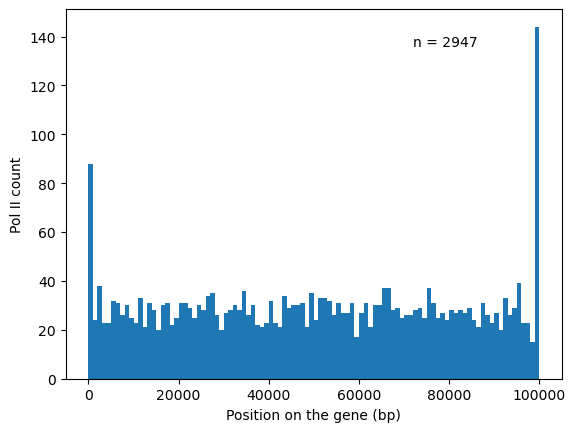

In [4]:
# The model simulates the Pol II movement in time slices of 1/30 seconds

# Define the parameters
initiation_rate = 1/(60 * 30)  # 1 event per 1 minute
elongation_rate = 1800.0 / (60.0 *30)  # 1800 bp per minute 
termination_rate = 1/(60 * 30)  # 1 event per 1 minute 
pause_escape_rate = 1/ (60 * 30)  # 1 event per minute
gene_length = 100000  # 100 kb gene
simulation_time = 6*3600 *30  # 6 hours simulation 
footprint = 34 # Pol II footprint
num_simulations = 100 #number of simulations

# Initialize the list of Pol II positions for all simulations
final_positions = []

# Simulate the Pol II movement for multiple simulations
for sim in range(num_simulations):
    # Initialize the Pol II positions
    pol_positions = []

    # Simulate the Pol II movement
    for time in range(simulation_time):
        
        # INITIATION
        # Check if a new Pol II should initiate
        if random.random() < initiation_rate:
            if len([p for p in pol_positions if p < footprint]) == 0:
                pol_positions.append(0)
        
        # PAUSE ESCAPE
        # Resume paused Pol II
        if 0 in pol_positions:
            if random.random() < pause_escape_rate:
                    pol_positions.remove(0)
                    pol_positions.append(1)
                    
        # ELONGATION
        # Sort the Pol II positions in ascending order
        pol_positions.sort()

        # Adjust the effective elongation rate based on the number of Pol II molecules (since only one Pol II molecule is randomly selected to move, the average elongation rate needs to be adjusted)
        num_pol = len(pol_positions)
        elongation_rate_effective = elongation_rate * num_pol

        # Randomly select a Pol II molecule to move
        if pol_positions:
            i = random.randint(0, len(pol_positions)-1)

            # If the Pol II is paused, it cannot move until it resumes
            if pol_positions[i] == 0:
                continue

            # If the Pol II is not paused
            else:
                # If the Pol II is the last one or is not blocked by the previous Pol II
                if i == len(pol_positions)-1:
                    if pol_positions[i] < gene_length:
                        pol_positions[i] += elongation_rate_effective
                    else:
                        continue
                elif pol_positions[i] + elongation_rate_effective + footprint < pol_positions[i+1]:
                    if pol_positions[i] < gene_length:
                        pol_positions[i] += elongation_rate_effective
                    else:
                        continue
                        
        # TERMINATION
        # Check if any Pol II molecule has reached the end of the gene
        for p in pol_positions:
            if p >= gene_length:
                if random.random() < termination_rate:
                    pol_positions.remove(p)
                else:
                    continue
            else:
                continue

    # Record the final positions of the Pol II molecules
    final_positions.append(pol_positions)
    
# Calculate the average position of each Pol II molecules
avg_positions = np.mean(final_positions, axis=0)*num_simulations

# Visualize the distribution of Pol II positions
plt.hist(avg_positions, bins=100)
plt.xlabel('Position on the gene (bp)')
plt.ylabel('Pol II count')
n = len(avg_positions)
plt.text(0.7, 0.9, f'n = {n}', transform=plt.gca().transAxes)
plt.show()
#print(avg_positions)